In [323]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [324]:
data = pd.read_excel('./MTcars.xlsx')
df = pd.DataFrame(data)
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [325]:
df.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [326]:
y = data.iloc[:,1].values
x = data.iloc[:,2:].values

In [327]:
model = smf.ols(formula = 'mpg ~ wt+cyl+hp+am+qsec+disp',data=df).fit()

In [328]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     26.91
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           9.29e-10
Time:                        21:55:45   Log-Likelihood:                -70.230
No. Observations:                  32   AIC:                             154.5
Df Residuals:                      25   BIC:                             164.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.0517     13.305      1.507      0.144      -7.350      47.454
wt            -3.9977      1.216     -3.289      0.003      -6.501      -1.494
cyl           -0.5021      0.789     -0.636      0.530      -2.127       1.123
hp            -0.0196      0.015     -1.314      0.201      -0.050       0.011
am             2.9407      1.718      1.712      0.099      -0.598       6.479
qsec           0.8102      0.572      1.417      0.169      -0.367       1.988
disp           0.0140      0.012      1.209      0.238      -0.010       0.038
==============================================================================
Omnibus:                        1.809   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.671
Skew:                           0.499   Prob(JB):                        0.434
Kurtosis:                       2.493   Cond. No.                     9.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [331]:
x=df[['wt','cyl','hp','am','qsec','disp']]


In [332]:
y_pred = model.predict(x)

In [333]:
mean_squared_error(data['mpg'],y_pred)  

4.718472292780023

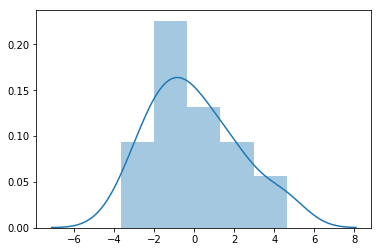

In [334]:
sns.distplot(model.resid)

In [335]:
from scipy.stats import shapiro

In [336]:
shapiro(model.resid)

(0.960046112537384, 0.2754743695259094)

In [337]:
sm.stats.diagnostic.kstest_normal(model.resid)

(0.09944056962060321, 0.2)

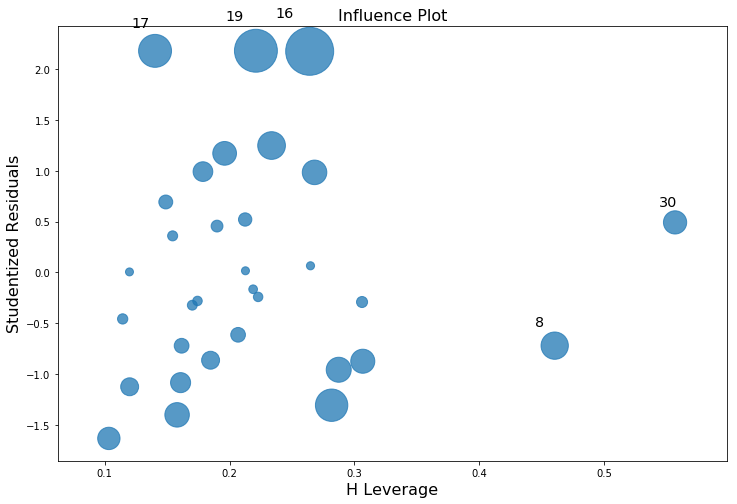

In [338]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model,ax=ax)

In [339]:
influ = model.get_influence()
cook = influ.summary_frame()
cook.head()

,dfb_Intercept,dfb_wt,dfb_cyl,dfb_hp,dfb_am,dfb_qsec,dfb_disp,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.054815,-0.130967,-0.153019,0.262133,-0.161047,0.117954,0.094286,2.433595e-02,-0.866918,0.184784,-0.412737,-0.862465,-0.410617
1,0.028618,-0.144913,-0.148921,0.176008,-0.176405,0.030337,0.108516,1.433746e-02,-0.620406,0.206819,-0.316800,-0.612606,-0.312817
2,0.007703,-0.045872,0.149369,-0.010034,-0.199715,-0.039736,-0.081667,4.105125e-02,-1.579387,0.103299,-0.536059,-1.630983,-0.553571
3,-0.000255,-0.001141,-0.000044,-0.000251,-0.000345,0.000610,0.001163,6.441723e-07,0.005755,0.119821,0.002123,0.005639,0.002081
4,-0.001345,-0.153642,0.037193,-0.040991,-0.031921,0.023972,0.128867,7.193462e-03,0.463381,0.189962,0.224397,0.455981,0.220814


In [340]:
cook[cook['cooks_d']>0.1]

,dfb_Intercept,dfb_wt,dfb_cyl,dfb_hp,dfb_am,dfb_qsec,dfb_disp,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
16,0.061332,0.752823,-0.450223,-0.037399,0.209182,-0.172500,0.122991,0.210947,2.028103,0.264163,1.215166,2.174000,1.302583
19,-0.744830,-0.468498,0.482593,0.109833,0.660484,0.825733,0.168653,0.167485,2.032295,0.221098,1.082773,2.179382,1.161138


In [346]:
data_new = data.drop(labels=[16,19])

In [347]:
data_new

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [345]:
data

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [348]:
model2 = smf.ols(formula = 'mpg ~ wt+cyl+hp+am+qsec+disp',data=data_new).fit()

In [349]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     28.96
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.28e-09
Time:                        21:58:05   Log-Likelihood:                -61.454
No. Observations:                  30   AIC:                             136.9
Df Residuals:                      23   BIC:                             146.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.7744     12.284      2.261      0.034       2.363      53.185
wt            -4.2912      1.153     -3.722      0.001      -6.676      -1.906
cyl           -0.5238      0.722     -0.725      0.476      -2.018       0.970
hp            -0.0205      0.013     -1.574      0.129      -0.047       0.006
am             1.6719      1.569      1.066      0.298      -1.574       4.917
qsec           0.4930      0.536      0.919      0.368      -0.617       1.603
disp           0.0111      0.010      1.098      0.284      -0.010       0.032
==============================================================================
Omnibus:                        3.424   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.181   Jarque-Bera (JB):                2.161
Skew:                           0.629   Prob(JB):                        0.339
Kurtosis:                       3.381   Cond. No.                     9.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [354]:
x2=data_new[['wt','cyl','hp','am','qsec','disp']]

In [355]:
y_pred2=model2.predict(x2)

In [356]:
mean_squared_error(data_new['mpg'],y_pred2)

3.522021447740626